In [ ]:
!pip install opencv-python 

In [1]:
import os 
import cv2
import numpy as np 

In [2]:
# Read the image of a cat
im = cv2.imread("C:/JS/Working_With_Image_Data/Data/kitty.jpg")

In [3]:
type(im) # Image is stored as a n-dimensional arrary 

numpy.ndarray

In [4]:
im.shape

# In this array you have 3 matrix each with size 1836*3264 
# By default a color image will be read in BGR space

(1836, 3264, 3)

In [5]:
# Let's read first matrix 
im[:,:,0]   # Matrix containing pixel intensities of Blue color 

array([[192, 192, 191, ..., 127, 130, 129],
       [192, 192, 192, ..., 127, 130, 131],
       [191, 192, 193, ..., 129, 127, 129],
       ...,
       [ 76,  74,  72, ...,  71,  72,  70],
       [ 72,  72,  73, ...,  73,  72,  68],
       [ 68,  71,  73, ...,  77,  75,  70]], dtype=uint8)

In [6]:
# Let's read second matrix 
im[:,:,1]   # Matrix containing pixel intensities of Green color 

array([[187, 187, 186, ..., 140, 141, 140],
       [187, 187, 187, ..., 140, 141, 142],
       [186, 187, 187, ..., 140, 138, 140],
       ...,
       [ 87,  85,  83, ...,  74,  75,  73],
       [ 85,  85,  84, ...,  76,  73,  69],
       [ 81,  84,  84, ...,  80,  76,  71]], dtype=uint8)

In [ ]:
# Let's read third matrix 
im[:,:,2]   # Matrix containing pixel intensities of Red color 

In [7]:
# Optional but you can convert a BGR space into RGB space 
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [8]:
print(im_rgb.shape)

(1836, 3264, 3)


In [9]:
# Convert a color image into a black and white image 
im_bw = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [10]:
print(im_bw.shape)

(1836, 3264)


In [14]:
# Visualize this image in notebook 
import matplotlib.pyplot as plt 
%matplotlib inline 

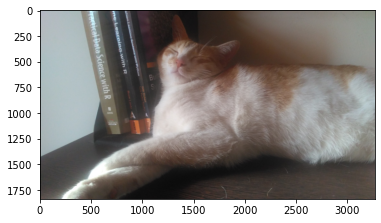

In [15]:
# Colored version of image
plt.imshow(im_rgb)

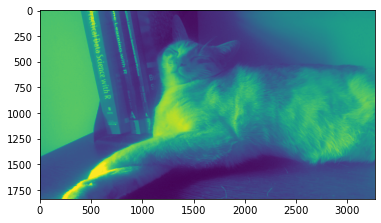

In [16]:
# Grayscale version of image
plt.imshow(im_bw)

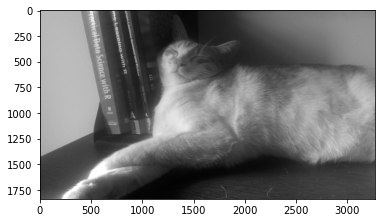

In [17]:
# to see gray image you need specify the cmap as gray
plt.imshow(im_bw, cmap= "gray")

## Resize or Adjust Images 

In [18]:
im_resized = cv2.resize(im_bw,(1000,1000), cv2.INTER_LINEAR)

In [19]:
im_resized.shape

(1000, 1000)

In [20]:
im_resized

array([[183, 184, 182, ..., 141, 141, 139],
       [183, 182, 185, ..., 142, 140, 135],
       [180, 183, 185, ..., 141, 140, 132],
       ...,
       [ 80,  85,  81, ...,  74,  78,  82],
       [ 85,  83,  83, ...,  76,  78,  80],
       [ 85,  82,  81, ...,  78,  82,  79]], dtype=uint8)

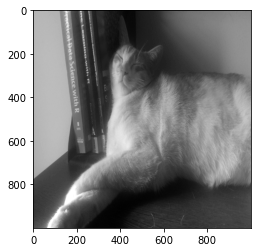

In [22]:
plt.imshow(im_resized, cmap= "gray")

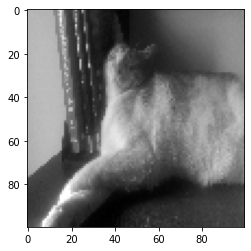

In [25]:
# Reduction in quality and ability to recoginize things in the images ( balanced out)
# Smaller this matrix better it is. 
im_resized = cv2.resize(im_bw,(100,100), cv2.INTER_LINEAR)
plt.imshow(im_resized, cmap= "gray")

## How to select some part of the image

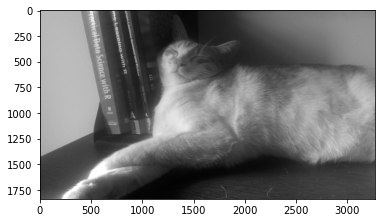

In [26]:
plt.imshow(im_bw, cmap= "gray")

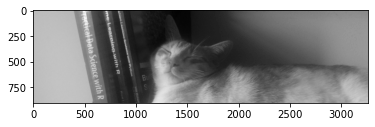

In [30]:
#im_bw[0:500,]
plt.imshow(im_bw[0:900,], cmap = "gray")

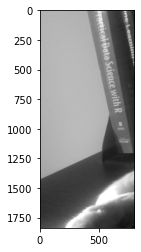

In [34]:
plt.imshow(im_bw[:,0:800], cmap = "gray")

## Flatting Of Images

In [40]:
five = cv2.imread("C:/JS/Working_With_Image_Data/Data/five.jpg")
seven = cv2.imread("C:/JS/Working_With_Image_Data/Data/seven.png")
two = cv2.imread("C:/JS/Working_With_Image_Data/Data/two.jpg")

In [41]:
# These are the the colored images
print(five.shape)
print(seven.shape)
print(two.shape)

# 3 says three color channels 

(225, 225, 3)
(225, 225, 3)
(225, 224, 3)


In [43]:
# Let's convert them into grayscale image 
five_gray = cv2.cvtColor(five, cv2.COLOR_BGR2GRAY)
seven_gray = cv2.cvtColor(seven, cv2.COLOR_BGR2GRAY)
two_gray = cv2.cvtColor(two, cv2.COLOR_BGR2GRAY)

In [44]:
print(five_gray.shape)
print(seven_gray.shape)
print(two_gray.shape)

(225, 225)
(225, 225)
(225, 224)


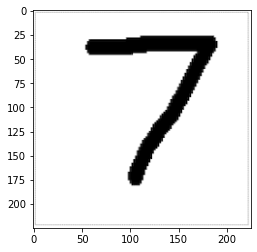

In [45]:
plt.imshow(seven_gray, cmap="gray")

In [46]:
# Ensure same size of m*n for each image 
five_gray_resized  = cv2.resize(five_gray,(100,100), cv2.INTER_LINEAR)
seven_gray_resized = cv2.resize(seven_gray,(100,100), cv2.INTER_LINEAR)
two_gray_resized   = cv2.resize(two_gray,(100,100), cv2.INTER_LINEAR)

In [47]:
print(five_gray_resized.shape)
print(seven_gray_resized.shape)
print(two_gray_resized.shape)

(100, 100)
(100, 100)
(100, 100)


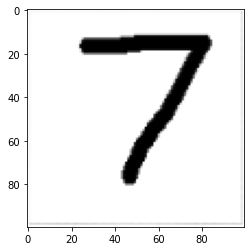

In [49]:
plt.imshow(seven_gray_resized, cmap="gray")

In [51]:
# To flatten the image we will use reshape command 
seven_flattened = seven_gray_resized.reshape(100*100)
five_flattened  = five_gray_resized.reshape(100*100)
two_flattened  = two_gray_resized.reshape(100*100)

In [53]:
seven_flattened

array([255, 249, 248, ..., 255, 255, 255], dtype=uint8)

In [54]:
seven_flattened.shape # ( 100*100 vector)

(10000,)

In [55]:
# Bind them row wise 
flattened_images = np.stack([seven_flattened,five_flattened,two_flattened], axis = 0)

In [56]:
flattened_images

array([[255, 249, 248, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [250, 255, 253, ..., 251, 251, 254]], dtype=uint8)

In [57]:
flattened_images.shape

# 3 rows and 10000 columns this is nothing but the feature set for Machine leaning model - "X"

(3, 10000)